<a href="https://colab.research.google.com/github/samsung-ai-course/6-7-edition/blob/main/Supervised%20Learning/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA) and Feature Engineering
This notebook demonstrates EDA and feature engineering with the Titanic dataset (classification task) and the Store Sales dataset (regression task).

## Part 1: Titanic Dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load Titanic dataset
path = "https://raw.githubusercontent.com/samsung-ai-course/6-7-edition/main/Supervised%20Learning/Datasets/titanic.csv" #or whatever other path you might have the file on titanic.csv
titanic = pd.read_csv(path)

# Preview dataset
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [2]:
# Basic information about the dataset
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [3]:
# Check for missing values
titanic.isnull().sum()

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

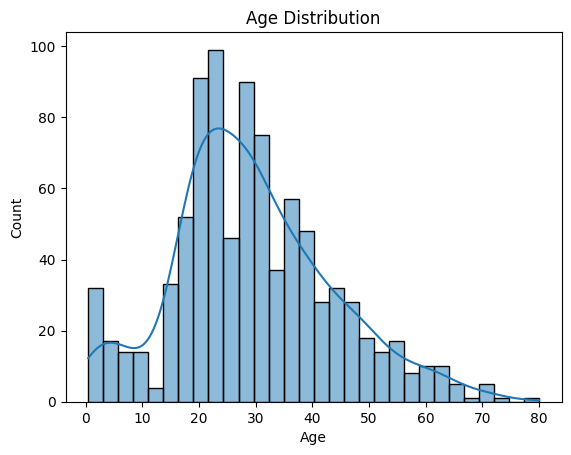

In [4]:
# Distribution of Age
sns.histplot(titanic['Age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.show()

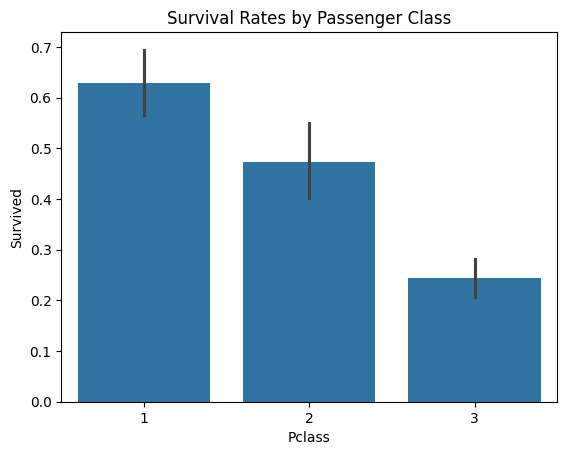

In [5]:
# Survival rates by Pclass
sns.barplot(x='Pclass', y='Survived', data=titanic)
plt.title('Survival Rates by Passenger Class')
plt.show()

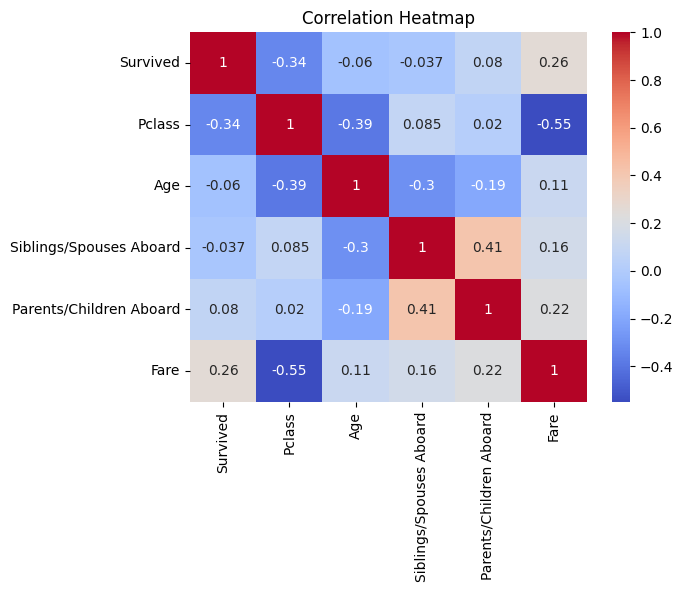

In [6]:
numerical_features = titanic.select_dtypes(include=['number']) #What is this doing?

sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Discussion
What conclusions can you take?

Which column/columns seems to be the most relevant to the target?

Which columns are extremely correlated ?

In [7]:
# Baseline experiment
# Predict everyone as non-survivors
baseline_prediction = np.zeros(len(titanic))
accuracy = (baseline_prediction == titanic['Survived']).mean()
print(f"Baseline Accuracy (predicting non-survivors): {accuracy:.2f}")

#What conclusion do you take from here ?

Baseline Accuracy (predicting non-survivors): 0.61


## Part 2: Feature Engineering with Titanic Dataset

In [8]:
# Categorical Encoding: One-hot encode 'Sex' and 'Pclass'
titanic_encoded = pd.get_dummies(titanic, columns=['Sex', 'Pclass'], drop_first=True)

# Handle missing values: Impute Age with median
titanic_encoded['Age'] = titanic_encoded['Age'].fillna(titanic_encoded['Age'].median())

# Feature Scaling: Normalize 'Fare'
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
titanic_encoded['Fare'] = scaler.fit_transform(titanic_encoded[['Fare']])
#TODO: What if we didnt normalize it ? How different would the results be ?

# Creating new features: FamilySize
titanic_encoded['FamilySize'] = titanic_encoded['Siblings/Spouses Aboard'] + titanic_encoded['Parents/Children Aboard'] + 1

# Preview the engineered dataset
titanic_encoded.head()

,Survived,Name,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex_male,Pclass_2,Pclass_3,FamilySize
0,0,Mr. Owen Harris Braund,22.0,1,0,0.014151,True,False,True,2
1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,38.0,1,0,0.139136,False,False,False,2
2,1,Miss. Laina Heikkinen,26.0,0,0,0.015469,False,False,True,1
3,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,35.0,1,0,0.103644,False,False,False,2
4,0,Mr. William Henry Allen,35.0,0,0,0.015713,True,False,True,1


## Part 3
Select the appropriate features and train a logistic regression, train a KNN, train a Naive Bayes and SVM.

Which one has a better accuracy ?

P.s check the documentation of each of those algorithms


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import svm


# Define features (X) and target (y)
X = titanic_encoded[['Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare', 'Sex_male', 'Pclass_2', 'Pclass_3', 'FamilySize']]
y = titanic_encoded['Survived']

# Split data into training and testing sets (we will come back to this later)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)
# Initialize and train a logistic regression model
model = LogisticRegression(max_iter = 1000) #TODO: What's this max_iter ? Try to change it as well.
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the logistic regression model: {accuracy}")

0.7415730337078652
Accuracy of the logistic regression model: 0.7471910112359551


In [10]:
clf = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
score = clf.score(X_test, y_test)
print(score)

0.7415730337078652


In [11]:
from sklearn.model_selection import RepeatedKFold
rkf = RepeatedKFold(n_splits=2, n_repeats=2, random_state=2652124)
rkf.get_n_splits(X, y)
for i, (train_index, test_index) in enumerate(rkf.split(X)):
    
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")



Fold 0:
  Train: index=[  2   3   4   6   7   8   9  11  15  17  22  26  28  30  33  35  36  37
  43  46  47  48  49  53  54  55  57  58  59  60  61  62  64  65  67  68
  69  70  71  75  76  78  80  82  84  85  88  90  92  93  94  95  98 100
 101 104 105 110 113 117 118 122 124 130 131 132 135 136 139 140 142 143
 147 150 151 152 153 154 156 158 160 161 162 163 165 166 167 168 169 170
 176 177 180 181 182 184 187 192 193 196 197 200 201 203 205 207 208 211
 212 213 215 217 219 220 223 224 225 228 229 230 232 234 236 237 239 240
 242 243 251 253 254 255 256 257 259 262 263 264 265 270 271 272 273 274
 276 277 279 284 285 287 289 290 291 292 294 295 297 298 300 301 305 306
 307 310 314 316 319 320 323 324 325 326 328 330 331 332 333 335 336 339
 340 345 349 352 355 356 358 360 361 362 367 368 370 373 377 378 380 382
 383 384 386 391 393 395 398 401 402 403 404 405 406 407 409 410 411 412
 414 418 420 423 424 427 428 431 432 433 434 435 436 437 440 441 442 443
 447 449 450 451 454 455 456

### KNN

In [12]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import RepeatedKFold
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn.model_selection import GridSearchCV



# from sklearn.metrics import accuracy_score

# # Initialize Repeated K-Fold Cross-Validation
# rkf = RepeatedKFold(n_splits=5, n_repeats=3, random_state=2652124)  # Adjusted to 5 splits and 3 repeats for better evaluation
# rkf.get_n_splits(X, y)

# # Initialize KNN
# # # model = KNeighborsClassifier(n_neighbors=5)
# model = GaussianNB()
# param_grid = {
#     'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]  # Common range for variance smoothing
# }
# grid_search = GridSearchCV(estimator=model, param_grid = param_grid, cv=5, scoring='f1')
# # svc = svm.SVC()
# # model = SVC()

# sum = 0
# # Perform K-Fold Cross-Validation
# for i, (train_index, test_index) in enumerate(rkf.split(X)):
    
#     # Split data for the current fold
#     X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#     y_train, y_test = y.iloc[train_index], y.iloc[test_index]

#     # Train the model
#     grid_search.fit(X_train, y_train)

#     # Make predictions
#     y_pred = model.predict(X_test)

#     # Calculate accuracy for this fold
#     accuracy = accuracy_score(y_test, y_pred)
#     sum += accuracy
#     # print(f"Fold {i + 1}: Accuracy = {accuracy:.2f}")
# print(f"Average Accuracy {sum/15}")


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

model = SVC()
param_grid = {
    'C': [0.1, 1],                   # Regularization parameter
    'kernel': ['linear', 'rbf',],      # Different kernels to try
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'degree': [2, 3]                       # Only relevant for 'poly' kernel
}
# random_search = RandomizedSearchCV()
grid_search = GridSearchCV(estimator=model, param_grid = param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train, )
y_pred = grid_search.predict(X_test)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy}")


accuracy: 0.7640449438202247


## Naive Bayes


In [14]:
from sklearn.naive_bayes import GaussianNB
NB = GaussianNB()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the logistic regression model: {accuracy}")



Accuracy of the logistic regression model: 0.7415730337078652


## SVM

In [15]:
from sklearn.svm import SVC
NB = SVC()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the logistic regression model: {accuracy}")

Accuracy of the logistic regression model: 0.6685393258426966


---

### PART 4 (You can stop here)

#### How close did we get ?

| **Task**          | **Metric**         | **When to Use**                                                |
|--------------------|--------------------|----------------------------------------------------------------|
| Classification     | Accuracy           | Balanced datasets, overall performance.                        |
| Classification     | Precision/Recall   | Imbalanced datasets or focus on specific outcomes.             |
| Classification     | F1-Score           | When balance between precision and recall is needed.           |
| Classification     | ROC-AUC            | Evaluating the model’s ranking performance over thresholds.     |
| Regression         | MAE                | Interpretability, less sensitive to outliers.                  |
| Regression         | MSE/RMSE           | Penalizing large errors, sensitive to outliers.                |
| Regression         | R²                 | Overall model fit and explained variance.                      |




Which model got the most survived right?

Which model got the most not survided right?

Evaluate Logistic Regression, KNN, Naive-Bayes and SVM.

Evaluating for the sake of this exercise means performing all of these:  confusion_matrix, precision_score, recall_score, f1_score and understanding what it means.

[ROC Explanation](https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc)


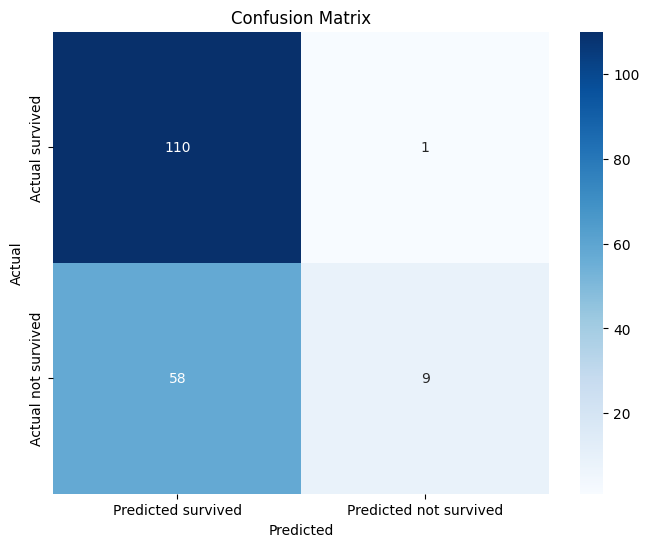

In [16]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted survived', 'Predicted not survived'],
            yticklabels=['Actual survived', 'Actual not survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [17]:
TP = cm[0][0]
FP = cm[1][0]
TN = cm[1][1]
FN = cm[0][1]
# Precision, Recall, F1-Score
precision = TP / (TP + FP)
recall = TP / (TP + FN)
f1 = 2 * precision * recall / (precision + recall)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# ROC AUC Score (if your model provides probabilities)
try:
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC AUC Score: {roc_auc:.2f}")
except AttributeError:
    print("ROC AUC Score not available. The model doesn't provide probability estimates.")

Precision: 0.65
Recall: 0.99
F1-Score: 0.79
ROC AUC Score not available. The model doesn't provide probability estimates.
